In [1]:
#Primero declaramos a las bibliotecas que utilizaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
#Leemos los archivos con los datos meteorológicos y de flujos.

dMeteo = pd.read_csv("meteo-vid-2018.csv", engine = "python")

#y nos deshacemos de las columnas que no necesitamos, las cuales no tienen informacion.
dMeteo= dMeteo.loc[:, ~dMeteo.columns.str.contains('^Unnamed')]


In [3]:
#Checamos los tipos de variables que tenemos.
dMeteo.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [4]:
#Ahora, tomamos la variable albedo_avg y la cambiamos a variable numérica 
dMeteo['albedo_Avg'] = dMeteo['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [5]:
#Creamos nuestra variable datetime del dataframe meteorologico.
dMeteo["Datetime"]= dMeteo["Date"] + " " + dMeteo["Time"]
#dMeteo.drop( ["Date","Time"], axis=1, inplace=True )

dMeteo.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,Datetime
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0,06/01/2018 17:00:00
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0,06/01/2018 17:30:00
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0,06/01/2018 18:00:00
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0,06/01/2018 18:30:00
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0,06/01/2018 19:00:00


In [6]:
#Ahora creamos una columna de Fecha, donde esten los datos del tipo datetime.
dMeteo['Fecha'] = pd.to_datetime(dMeteo.apply(lambda x: x['Datetime'], 1), dayfirst=True)
dMeteo= dMeteo.drop(['Datetime'], 1)

#Creamos dos nuevas columnas para almacenar el año, mes, dia,hora y minuto de la toma de datos.
dMeteo['Año'] = dMeteo['Fecha'].dt.year
dMeteo['Mes'] = dMeteo['Fecha'].dt.month
dMeteo['Dia'] = dMeteo['Fecha'].dt.day
dMeteo['Hora'] = dMeteo['Fecha'].dt.hour 
dMeteo['Min']= dMeteo['Fecha'].dt.minute

#Agrupamos algunas de las variables que vamos a necesitar.
dMeteo['AirTC_Avg_max'] = dMeteo.groupby(['Mes','Dia'])['AirTC_Avg'].transform('max')
dMeteo['AirTC_Avg_min'] = dMeteo.groupby(['Mes','Dia'])['AirTC_Avg'].transform('min')
dMeteo['RH_max'] = dMeteo.groupby(['Mes','Dia'])['RH'].transform('max')
dMeteo['RH_min'] = dMeteo.groupby(['Mes','Dia'])['RH'].transform('min')

#Tambien agruparemos los promedios mensuales.
dMeteo_Pm= pd.DataFrame()
dMeteo_Pm['VELVPROM']= dMeteo.groupby(['Mes'])['WS_ms_S_WVT'].transform('mean')
dMeteo_Pm['VELVPROM']= dMeteo.groupby(['Mes'])['WS_ms_S_WVT'].transform('mean')
dMeteo_Pm['TMAX']= dMeteo.groupby(['Mes'])['AirTC_Avg_max'].transform('mean')
dMeteo_Pm['TMIN']= dMeteo.groupby(['Mes'])['AirTC_Avg_min'].transform('mean')
dMeteo_Pm['TPROM']= dMeteo.groupby(['Mes'])['AirTC_Avg'].transform('mean')
dMeteo_Pm['RHMAX']= dMeteo.groupby(['Mes'])['RH_max'].transform('mean')
dMeteo_Pm['RHMIN']= dMeteo.groupby(['Mes'])['RH_min'].transform('mean')
dMeteo_Pm['RHPROM']= dMeteo.groupby(['Mes'])['RH'].transform('mean')
dMeteo_Pm['RADSOL']= dMeteo.groupby(['Mes'])['Rn_Avg'].transform('mean')
dMeteo_Pm['ALBEDO']= dMeteo.groupby(['Mes'])['albedo_Avg'].transform('mean')

#Finalmente eliminamos los valores repetidos.
dMeteo_Pm = dMeteo_Pm.drop_duplicates(subset=['VELVPROM','TMAX','TMIN','RHMAX','RHMIN','RHPROM','RADSOL','ALBEDO'])

#Eliminamos las columnas que contengan valores NaN
dMeteo_Pm = dMeteo_Pm.dropna(how='any')

Meses= ['Enero','Feb','Marzo','Abril','Mayo','Junio','Julio','Agost','Sept','Oct','Nov','Dic']
dMeteo_Pm = dMeteo_Pm.reset_index(drop=True)

dMeteo_Pm.head()

,VELVPROM,TMAX,TMIN,TPROM,RHMAX,RHMIN,RHPROM,RADSOL,ALBEDO
0,1.943827,27.341210,7.501276,16.963975,66.380848,14.056733,38.471432,34.734815,-0.423822
1,1.964189,25.320357,9.433214,17.230275,72.542857,25.725357,48.168006,56.250350,-0.479545
2,1.926196,29.519355,8.883548,19.282359,68.361613,15.204839,36.968353,92.894913,-0.409137
3,2.101812,32.671667,10.781667,21.880618,76.585000,15.712333,40.785667,134.012965,-0.386088
4,2.113918,34.133548,12.781290,23.650034,79.971935,17.229032,44.233468,162.405343,-0.367835


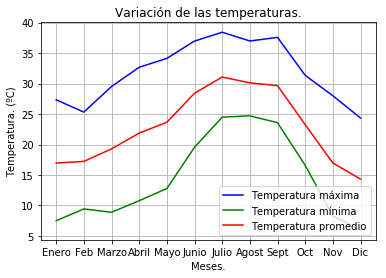

In [7]:
#Gráfica de variación temporal de temperaturas.
x = Meses
n = np.arange(len(Meses))
y = dMeteo_Pm['TMAX']
y1 = dMeteo_Pm['TMIN']
y2 = dMeteo_Pm['TPROM']
plt.plot(x, y, label="Temperatura máxima", color = 'B')  
plt.plot(y1, label="Temperatura mínima", color = 'G')
plt.plot(y2, label="Temperatura promedio", color = 'r')
plt.xlabel("Meses.")
plt.ylabel("Temperatura. (ºC)")
plt.title('Variación de las temperaturas.')
plt.savefig('Tempmen',plt=2000)
plt.legend()
plt.grid()
plt.show() 

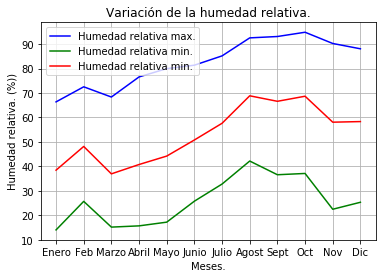

In [8]:
#Gráfica de variación temporal de la humedad relativa.
x= Meses
n= np.arange(len(Meses))
y= dMeteo_Pm['RHMAX']
y1= dMeteo_Pm['RHMIN']
y2= dMeteo_Pm['RHPROM']
plt.plot(x, y, label="Humedad relativa max.", color = 'B')  
plt.plot(y1, label="Humedad relativa min.", color = 'G')
plt.plot(y2, label="Humedad relativa min.", color = 'r')
plt.xlabel("Meses.")
plt.ylabel("Humedad relativa. (%))")
plt.title('Variación de la humedad relativa.')
plt.savefig('RHmen',plt=2000)
plt.legend()
plt.grid()
plt.show()     

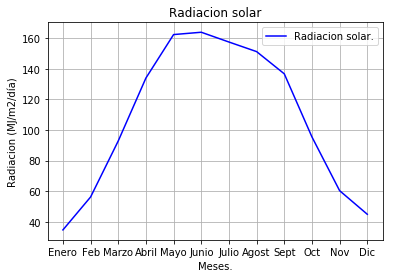

In [9]:
#Gráfica de la radiacion solar.
x= Meses
n= np.arange(len(Meses))
y= dMeteo_Pm['RADSOL']
plt.plot(x, y, label="Radiacion solar.", color = 'B')  
plt.xlabel("Meses.")
plt.ylabel("Radiacion (MJ/m2/día)")
plt.title("Radiacion solar")
plt.savefig('RadSol',plt=2000)
plt.legend()
plt.grid()
plt.show() 

In [10]:
#Ahora comenzamos a realizar la segunda parte.
#################################################
#Primero utilizaremos la ecuacion de Jensen y Haise ¨ecuacion 7¨, para el calculo de la evotranspiracion.
Etoec7= []
for i in range(0, len(dMeteo_Pm)):
    Etoec7.append((0.0252*dMeteo_Pm['TPROM'][i] + 0.078)*dMeteo_Pm['RADSOL'][i])
    
#Ahora usaremos la ecuacion de Valiantzas ¨ecuacion 31¨, para el calculo de la evotranspiracion.
#Usando a phi como la latitud en radianes.
phi = (math.pi/180)*28.94917
Etoec31= []
for i in range(0, len(dMeteo_Pm)):
    Etoec31.append(0.0393*dMeteo_Pm["RADSOL"][i]*(dMeteo_Pm["TPROM"][i]+9.5)**0.5 - 0.19*(dMeteo_Pm["RADSOL"][i]**0.6)*(phi**0.15) + 0.0061*(dMeteo_Pm["TPROM"][i] + 20)*(1.11*dMeteo_Pm["TPROM"][i]-dMeteo_Pm["TMIN"][i]-2)**0.7)

#Ahora, procederemos a utilizar la ecuacionde Valiantzas4 ¨ecuacion 32¨, parael calculo de la evotranspiracion.
#Asi que lo primero que haremos sera obtener las variables necesarias, de la siguiente manera:

disr= []
delt= []
omeg= []

for n in range (0, len(dMeteo_Pm)):
    j= int(30.4*n -15)
    disr.append(1+0.033*math.cos(((2*math.pi)/365)*j))
    delt.append(0.409*math.sin(((2*math.pi)/365)*j-1.39))
    omeg.append(math.acos(-math.tan(phi)*math.tan(0.409*math.sin(((2*math.pi)/365)*j-1.39))))
    
#Despues, convertimos los datos de los arreglos en valores numericos para poder trabajar con ellos.
#Para esto, lo primero que vamos a hacer es que crearemos un nuevo dataframe donde los guardaremos
#para despues poder crear una tabla con todos los datos.



In [11]:
dvnum = pd.DataFrame()
dvnum["disr"]= disr
dvnum["delt"]= delt
dvnum["omeg"]= omeg
dvnum["disr"] = dvnum["disr"].apply(lambda col:pd.to_numeric(col, errors="coerce"))
dvnum["delt"] = dvnum["delt"].apply(lambda col:pd.to_numeric(col, errors="coerce"))
dvnum["omeg"] = dvnum["omeg"].apply(lambda col:pd.to_numeric(col, errors="coerce"))

rads= []
for m in range (0, len(dMeteo_Pm)):
    rads.append(((24*60)/math.pi)*0.0820*(dvnum["omeg"][m]*math.sin(phi)*math.sin(dvnum["delt"][m])+math.cos(phi)*math.cos(dvnum["delt"][m])*math.sin(dvnum["omeg"][m])))
                                        


In [12]:
dvnum["rads"]= rads
dvnum["rads"] = dvnum["rads"].apply(lambda col:pd.to_numeric(col, errors="coerce"))
dvnum.head()

,disr,delt,omeg,rads
0,1.031906,-0.407775,1.329507,19.726184
1,1.031906,-0.370216,1.354428,21.030913
2,1.023584,-0.236097,1.437322,25.576301
3,1.008564,-0.033386,1.552321,31.923000
4,0.991711,0.172248,1.667178,37.451166


In [13]:
#Ahora, ya ontenidas todas las variables necesarias, procederemos a utilizar la ecuacion Valiantzas4
Etoec32= []
for i in range (0, len(dMeteo_Pm)):
    Etoec32.append(0.051*(1 - dMeteo_Pm["ALBEDO"][i])*dMeteo_Pm["RADSOL"][i]*(dMeteo_Pm["TPROM"][i]+9.5)**0.5-2.4*(dMeteo_Pm["RADSOL"][i]/dvnum["rads"][i])**2+0.048*(dMeteo_Pm["TPROM"][i]+20)*(1-dMeteo_Pm["RHPROM"][i]/100)*(0.5+0.536*dMeteo_Pm["VELVPROM"][i])+0.00012*101)
    
#Creamos un nuevo dataframe para almacenar los resultados de las ecuaciones.
dfnw= pd.DataFrame()
dfnw["Etoec7"]= Etoec7
dfnw["Etoec31"]= Etoec31
dfnw["Etoec32"]= Etoec32
dfnw["Meses"]= Meses
dfnw.set_index("Meses")

,Etoec7,Etoec31,Etoec32
Meses,,,
Enero,17.558177,6.657568,7.229301
Feb,28.811594,10.451888,6.225899
Marzo,52.384876,18.229801,5.988913
Abril,84.346631,27.675580,12.721210
Mayo,109.458090,34.580933,22.018419
Junio,130.171712,37.491710,34.816797
Julio,135.614481,37.196379,29.379138
Agost,126.623032,35.098257,36.723789
Sept,112.882131,31.574853,36.355425


In [14]:
#Ya obtenida la ecuacion 32, procederemos a relaizar la 3ra parte de la evaluacion.
#####################################################################################
#Para esta seccion utilizaremos el archivo de datos de flujos.
dFlujo =pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine = "python"))

dFlujo = dFlujo.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'],axis=1)
dFlujo = dFlujo.drop(dFlujo.index[0]).reset_index(drop=True)
dFlujo['Hour'] = dFlujo['Hour'].astype(str)
dFlujo.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,2018,7,0.5,-0.87,11.52,-20.04
1,2018,7,1,-0.97,15.11,-7.34
2,2018,7,1.5,-0.96,8.61,-9.76
3,2018,7,2,-2.06,1.93,-8.55
4,2018,7,2.5,-1.32,6.40,-0.55


In [15]:
hora=[]
minuto=[]

for i in range (0, len(dFlujo)):

    #Si contiene 1 caracter:
    if (len(str(dFlujo['Hour'][i]))==1):
            hora.append(str(dFlujo['Hour'][i])[0:1])
            minuto.append('00')
        
    #Si contiene 2 caracteres:
    if(len(str(dFlujo['Hour'][i]))==2):
        if (str(dFlujo['Hour'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:        
            hora.append(str(dFlujo['Hour'][i])[0:2])
            minuto.append('00')
    
    #Si contiene 3 caracteres:
    elif(len(str(dFlujo['Hour'][i]))==3):
            hora.append(str(dFlujo['Hour'][i])[0:1])
            minuto.append('30')

    #Si contiene 3 caracteres:
    elif(len(str(dFlujo['Hour'][i]))==4):
            hora.append(str(dFlujo['Hour'][i])[0:2])
            minuto.append('30')
dias =[dFlujo['DoY'][i] for i in range(0, len(dFlujo))]

d = {'DIA': dias, 'HORA': hora, 'MINUTO':minuto}
dfechas = pd.DataFrame(data=d)

dfechas['DIA'] = dfechas['DIA'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
dia=[]
for i in range(0,len(dfechas)):
    if (dfechas['HORA'][i]=='00' and dfechas['MINUTO'][i]=='00'):
        dia.append(dfechas['DIA'][i] +1)
    else:
        dia.append(dfechas['DIA'][i])
        
dfechas['DIA']=dia
dfechas.head()

,DIA,HORA,MINUTO
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30


In [16]:
fechas = []
for i in range (0, len(dFlujo)):
    fechas.append('2018 '+str(dfechas['DIA'][i])+ ' ' + dfechas['HORA'][i]+' '+dfechas['MINUTO'][i])
    
FECH = []
for i in range(0,len(dFlujo)):
    d= datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECH.append(F)

In [17]:
dFlujo = dFlujo.apply(pd.to_numeric, errors='coerce')
dFlujo.dtypes

Year      int64
DoY       int64
Hour    float64
Rg_f    float64
LE_f    float64
H_f     float64
dtype: object

In [18]:
dFlujo["FECH"]= FECH
dFlujo.head(), dFlujo.tail()

(   Year  DoY  Hour  Rg_f   LE_f    H_f                 FECH
 0  2018    7   0.5 -0.87  11.52 -20.04  2018-01-07 00:30:00
 1  2018    7   1.0 -0.97  15.11  -7.34  2018-01-07 01:00:00
 2  2018    7   1.5 -0.96   8.61  -9.76  2018-01-07 01:30:00
 3  2018    7   2.0 -2.06   1.93  -8.55  2018-01-07 02:00:00
 4  2018    7   2.5 -1.32   6.40  -0.55  2018-01-07 02:30:00,
        Year  DoY  Hour  Rg_f  LE_f    H_f                 FECH
 17227  2018  365  22.0 -1.93  2.79  -0.75  2018-12-31 22:00:00
 17228  2018  365  22.5 -2.00  0.63  -3.72  2018-12-31 22:30:00
 17229  2018  365  23.0 -2.11  1.06  -3.49  2018-12-31 23:00:00
 17230  2018  365  23.5 -1.92 -0.46  -9.24  2018-12-31 23:30:00
 17231  2018  365  24.0 -2.64 -2.29  27.24  2019-01-01 00:00:00)

In [19]:
#Convertimos la columna Fecha a tipo datetime
dFlujo["FECHA"] = pd.to_datetime(dFlujo.apply(lambda x: x["FECH"], 1), dayfirst=True)
dFlujo = dFlujo.drop(['FECH','Year','DoY','Hour'], 1)

In [20]:
dFlujo['MES'] = dFlujo['FECHA'].dt.month
dFlujo['DIA'] = dFlujo['FECHA'].dt.day
dFlujo['HORA']= dFlujo['FECHA'].dt.hour

In [21]:
dflujo2 = pd.DataFrame()

dflujo2['FECHA']= dFlujo['FECHA']
dflujo2['MES'] = dFlujo['MES']
dflujo2['DIA'] = dFlujo['DIA']
dflujo2['HORA']= dFlujo['HORA']
dflujo2["Rg_f_mean"]= dFlujo.groupby(["MES","DIA","HORA"])["Rg_f"].transform("mean")
dflujo2["LE_f_mean"]= dFlujo.groupby(["MES","DIA","HORA"])["LE_f"].transform("mean")
dflujo2["H_f_mean"] = dFlujo.groupby(["MES","DIA","HORA"])["H_f"].transform("mean")

dflujo2 = dflujo2.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])
dflujo2.head(), dflujo2.tail()

(                FECHA  MES  DIA  HORA  Rg_f_mean  LE_f_mean  H_f_mean
 0 2018-01-07 00:30:00    1    7     0     -0.870     11.520   -20.040
 1 2018-01-07 01:00:00    1    7     1     -0.965     11.860    -8.550
 3 2018-01-07 02:00:00    1    7     2     -1.690      4.165    -4.550
 5 2018-01-07 03:00:00    1    7     3     -1.180      2.420    -2.765
 7 2018-01-07 04:00:00    1    7     4     -1.490      4.145    -4.680,
                     FECHA  MES  DIA  HORA  Rg_f_mean  LE_f_mean  H_f_mean
 17223 2018-12-31 20:00:00   12   31    20     -2.780      0.955    -1.720
 17225 2018-12-31 21:00:00   12   31    21     -1.990     -0.200    -0.870
 17227 2018-12-31 22:00:00   12   31    22     -1.965      1.710    -2.235
 17229 2018-12-31 23:00:00   12   31    23     -2.015      0.300    -6.365
 17231 2019-01-01 00:00:00    1    1     0     -2.640     -2.290    27.240)

In [22]:
dflujo2= dflujo2[dflujo2['MES']==2]
dflujo2=dflujo2.reset_index(drop=True)
dflujo2.head(), dflujo2.tail()

(                FECHA  MES  DIA  HORA  Rg_f_mean  LE_f_mean  H_f_mean
 0 2018-02-01 00:00:00    2    1     0     -2.955      1.895    -2.275
 1 2018-02-01 01:00:00    2    1     1     -2.725      1.630     8.720
 2 2018-02-01 02:00:00    2    1     2     -2.060      1.340   -17.470
 3 2018-02-01 03:00:00    2    1     3     -3.025      0.975    -6.600
 4 2018-02-01 04:00:00    2    1     4     -1.760     -2.405   -10.330,
                   FECHA  MES  DIA  HORA  Rg_f_mean  LE_f_mean  H_f_mean
 667 2018-02-28 19:00:00    2   28    19     -2.405     -1.180    -5.110
 668 2018-02-28 20:00:00    2   28    20     -3.620      1.840   -33.395
 669 2018-02-28 21:00:00    2   28    21     -4.215      1.775   -26.950
 670 2018-02-28 22:00:00    2   28    22     -3.885      5.175   -19.175
 671 2018-02-28 23:00:00    2   28    23     -3.235      0.000   -10.845)

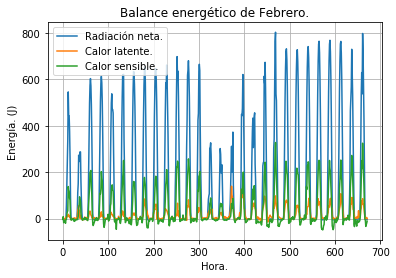

In [23]:
#Graica del balance enetico de Febrero.
Y1 = dflujo2['Rg_f_mean']          
Y2 = dflujo2['LE_f_mean']       
Y3 = dflujo2['H_f_mean']         
plt.plot(Y1, label="Radiación neta.")
plt.xlabel("Hora.")                                           
plt.ylabel("Energía. (J)")                               
plt.grid()
plt.plot(Y2, label="Calor latente.")   
plt.legend()                                                
plt.plot(Y3, label="Calor sensible.")  
plt.legend()                                                
plt.title('Balance energético de Febrero.')  
plt.savefig('emensual',plt=2000)                        
plt.show()

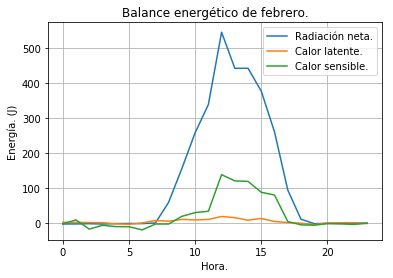

In [24]:
dflujo3=dflujo2[dflujo2['DIA']==1]
dflujo3=dflujo3.reset_index(drop=True)
dflujo3.head(), dflujo3.tail()

HORAS=[i for i in range(0,24)]

X = HORAS                           
N = np.arange(24)           
Y1 = dflujo3['Rg_f_mean']       
Y2 = dflujo3['LE_f_mean']       
Y3 = dflujo3['H_f_mean']        
plt.plot(X, Y1, label="Radiación neta.")   
plt.xlabel("Hora.")                                          
plt.ylabel("Energía. (J)")                           
plt.grid()
plt.plot(Y2, label="Calor latente.")   
plt.legend()                                                
plt.plot(Y3, label="Calor sensible.")
plt.legend()                                        
plt.title('Balance energético de febrero.') 
plt.savefig('edia',plt=2000)                            
plt.show()

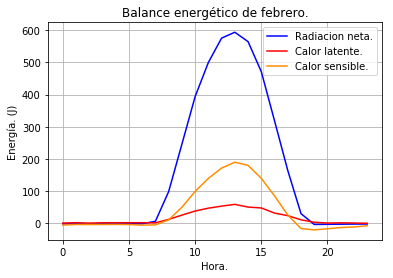

In [25]:
dflujo4=pd.DataFrame()
dflujo4['HORA']=dflujo2['HORA']
dflujo4['FECHA']=dflujo2['FECHA']
dflujo4["Rg_f_mean"] =dflujo2.groupby(["HORA"])["Rg_f_mean"].transform("mean")
dflujo4["LE_f_mean"] =dflujo2.groupby(["HORA"])["LE_f_mean"].transform("mean")
dflujo4["H_f_mean"] =dflujo2.groupby(["HORA"])["H_f_mean"].transform("mean")
dflujo4=dflujo4.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])

X = HORAS                      
N = np.arange(24)           
Y1 = dflujo4['Rg_f_mean']          
Y2 = dflujo4['LE_f_mean']          
Y3 = dflujo4['H_f_mean']           
plt.plot(X, Y1, label="Radiacion neta.", color = 'b')         
plt.xlabel("Hora.")                                      
plt.ylabel("Energía. (J)")                               
plt.grid()
plt.plot(Y2, label="Calor latente.", color = 'r')
plt.legend()                                            
plt.plot(Y3, label="Calor sensible.", color = 'darkorange')  
plt.legend()                                    
plt.title('Balance energético de febrero.')   
plt.savefig('ehoramensual',plt=2000)                    
plt.show()